RUJUL SRIVASTAVA (20BIT0187), MEGHA MAITIN (20BIT0177), ESHAN BAJAJ (20BIT0191)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [2]:
#importing python libraries

import numpy as np
import pandas as pd

In [6]:
#Reading the CICDarknet2020 dataset
#The dataset can be accessed from : https://www.unb.ca/cic/datasets/darknet2020.html

df = pd.read_csv("drive/My Drive/DATAMININGPROJECT/Darknet.csv")
df.head(10)

FileNotFoundError: ignored

In [ ]:
#Displaying all 85 columns present in the dataset

df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [ ]:
#Getting all the columns with total number of entries in each column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [ ]:
#Displaying Correlation matrix to know the dependency of columns on each other in the dataset

corr = df.corr()
corr.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Src Port,1.000000,-0.246451,-0.097384,0.065328,-0.036259,-0.014248,-0.019712,-0.008271,0.076486,-0.090022,...,-0.028619,0.138354,NaN,NaN,NaN,NaN,0.073322,0.058640,0.077872,0.031325
Dst Port,-0.246451,1.000000,-0.321199,0.039227,0.022094,0.014775,0.004451,0.010865,0.004448,-0.178715,...,0.014722,0.246275,NaN,NaN,NaN,NaN,0.069783,-0.000714,0.064389,0.060123
Protocol,-0.097384,-0.321199,1.000000,-0.266954,-0.034735,-0.026164,-0.023039,-0.020874,-0.195123,0.564044,...,-0.023370,-0.872467,NaN,NaN,NaN,NaN,-0.222856,-0.155842,-0.236589,-0.129430
Flow Duration,0.065328,0.039227,-0.266954,1.000000,0.142110,0.100288,0.072529,0.057008,0.340744,-0.068930,...,0.145455,0.240411,NaN,NaN,NaN,NaN,0.505334,0.127554,0.506068,0.409003
Total Fwd Packet,-0.036259,0.022094,-0.034735,0.142110,1.000000,0.744834,0.457391,0.635688,0.125575,-0.020982,...,0.698507,0.029652,NaN,NaN,NaN,NaN,0.066403,-0.017735,0.062264,0.074037


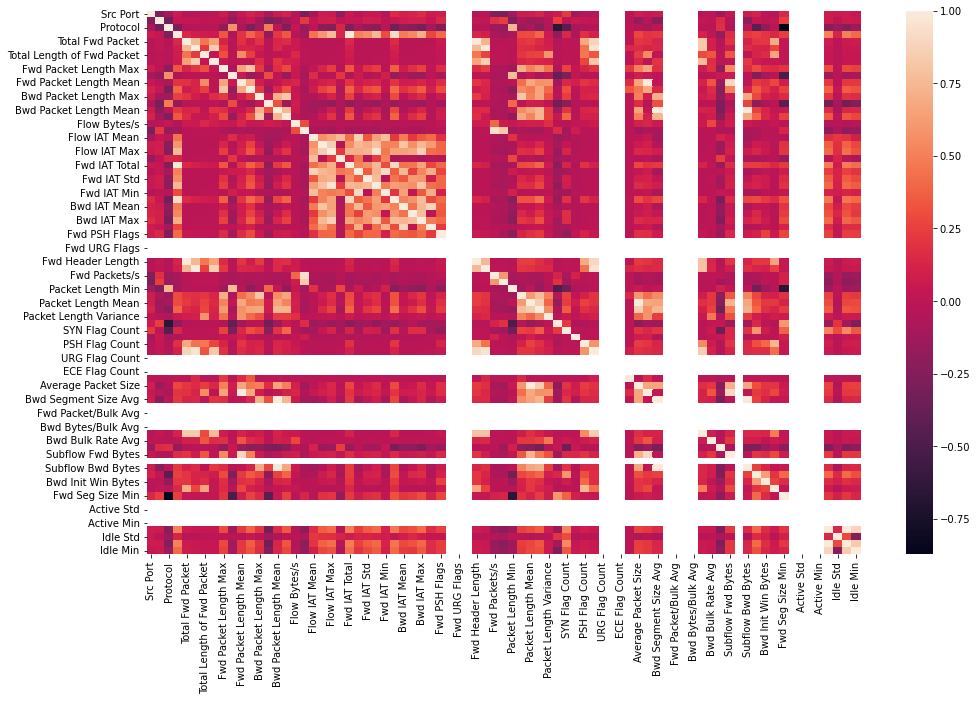

In [ ]:
#Displaying Correlation matrix in the form of heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
import seaborn as sns
sns.heatmap(corr)

#Data Cleaning
In this stage, I will be performing data cleaning like dealing with missing values,inf values,changing the columns like splitting columns if required. So when all the columns that may cause error further due to their datatype or format or problematic values will be rectified and then we can proceed towards data preprocessing stage.

In [ ]:
#Displaying null value columns

df.isna().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

In [ ]:
#dropping null values from the dataset

df.dropna() 

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [ ]:
#Checking the number of null values in each column of the dataset

df.isnull().sum().head()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
dtype: int64

In [ ]:
#Checking the number of classes in Label

df['Label'].value_counts() 

Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

In [ ]:
#Checking the number of classes in Label

df['Label.1'].value_counts()

P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label.1, dtype: int64

In [ ]:
#Split the Src IP into octets and getting first two ocets

newIP = []
for value in df['Src IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]

    #print(octet2)
    
    newIP.append(float(octet1 + '.' + octet2))

In [ ]:
 #Displaying modified dataframe

df1 = pd.DataFrame(newIP) 
df1.head()

,0
0,10.152
1,10.152
2,10.152
3,10.152
4,10.152


In [ ]:
#Replacing column 'Src IP' with modified dataframe 'df1'

df['Src IP'] = df1  
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [ ]:
#Splitting the Dst IP into octets and getting first two ocets

newIP1 = [] 
for value in df['Dst IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]

    #print(octet2)

    newIP1.append(float(octet1 + '.' + octet2))

In [ ]:
#Displaying the modified dataframe

df2 = pd.DataFrame(newIP1)
df2.head()

,0
0,216.580
1,216.580
2,216.580
3,74.125
4,173.194


In [ ]:
df['Dst IP'] = df2
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


#Data Preprocessing:Encoding,Sampling,Normalisation

In [ ]:
# Label Encoding: Label and Label.1

from sklearn.preprocessing import LabelEncoder 
  
Le = LabelEncoder() 
  
df['Label']= Le.fit_transform(df['Label'])
df['Label.1']= Le.fit_transform(df['Label.1'])
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,0,0


In [ ]:
#Dropping the unnecessary columns from datasets

df5=df.drop(['Flow ID','Timestamp'], axis = 1) 
df5.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,0,0


In [ ]:
#Converting it from exponential values to normal float values

df5['Idle Mean']=df5['Idle Mean']/1e15
df5['Idle Max']=df5['Idle Max']/1e15
df5['Idle Min']=df5['Idle Min']/1e15
df5['Idle Std']=df5['Idle Std']/1e7

In [ ]:
df5.head(5)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.43776,0.311772,1.43776,1.43776,0,0


In [ ]:
df5.isnull().values.any() 

True

In [ ]:
#Filling null values with the mean of the column

df5.fillna(df5.mean()).head(5) 

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.00000,0.000000,0.00000,0.00000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.43776,0.311772,1.43776,1.43776,0,0


In [ ]:
#Check if there is no more null values in the dataset : True-null values present; False-no null present

df5.notnull().values.all() 

False

In [ ]:
df5=df5.astype(float)

Below is an attempt to find the index of the maximum value in each column. In this way I will come to know if there is inf in any column and if it is there then what is the row number. These values will then be removed so that there is no error during normalisation.

In [ ]:
# Finding the index position of maximun values in every column

maxValueIndex = df5.idxmax() 
  
print("Maximum values of columns are at row index position :") 
print(maxValueIndex) 

Maximum values of columns are at row index position :
Src IP       58156
Src Port    109235
Dst IP       94335
Dst Port     43964
Protocol       263
             ...  
Idle Std       428
Idle Max       477
Idle Min       793
Label       118611
Label.1     113067
Length: 83, dtype: int64


In [ ]:
# Replacing infinite value with nan 

df5.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [ ]:
# Dropping all the rows with nan values from the dataframe

df5.dropna(inplace=True) 

df5.head(5)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,0.0,0.0,0.0,0.0,1.43776,0.311772,1.43776,1.43776,0.0,0.0


#Sampling :Oversampling and Undersampling
Sampling is used to balance the data i.e to balance the number of each class in the Label.

Oversampling: to increase the number of minority classes

Undersampling: to decease the number of majority classes

In [ ]:
df5['Label.1'].value_counts()

7.0     48520
2.0     32808
1.0     16580
3.0     11473
5.0     11089
9.0      9467
4.0      6143
8.0      3566
0.0      1470
10.0      281
6.0        84
Name: Label.1, dtype: int64

In [ ]:
#To deal with the imbalanced data we will oversample all classes once using "SMOTE module" for multiclass oversampling

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [ ]:
#Forming a new dataframe for the target variable and removing it from the modified dataframe

target = df5.filter(['Label.1'], axis=1)
target.head()

,Label.1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
df5 = df5.drop('Label.1', 1)
df5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,20.0,0.0,0.0,0.0,0.0,1.43776,0.311772,1.43776,1.43776,0.0


In [ ]:
target.shape

(141481, 1)

In [ ]:
x1=df5.values
oversample = SMOTE()
X1,target = oversample.fit_resample(x1,target)

# Summarize Distribution

counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100

In [ ]:
target['Label.1'].value_counts()

0.0     48520
2.0     48520
3.0     48520
4.0     48520
5.0     48520
6.0     48520
7.0     48520
9.0     48520
1.0     48520
10.0    48520
8.0     48520
Name: Label.1, dtype: int64

In [ ]:
target.shape

(533720, 1)

In [ ]:
X1.shape

(533720, 82)

In [ ]:
df5.shape

(141481, 82)

In [ ]:
balance_df = pd.DataFrame(X1,columns = df5.columns)
balance_df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,20.0,0.0,0.0,0.0,0.0,1.43776,0.311772,1.43776,1.43776,0.0


In [ ]:
balance_df.shape

(533720, 82)

Now I will be normalising all the values of the dataset. This is necessary for the consistency of the values of the dataset. I will be using MinMaxScaler for normalisation. So all the values will be converted into values between 0 to 1.

In [ ]:
#MinMaxScaling for Normalization

import pandas as pd
from sklearn import preprocessing

In [ ]:
#Returns numpy array

x = balance_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_final = pd.DataFrame(x_scaled,columns = balance_df.columns)
df_final.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.045466,0.872188,0.847913,0.006760,0.352941,0.000002,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
1,0.045466,0.872204,0.847913,0.006760,0.352941,0.000003,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
2,0.045466,0.872219,0.847913,0.006760,0.352941,0.000004,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
3,0.045466,0.749748,0.287717,0.006760,0.352941,0.000003,0.000000,0.000002,0.000000,0.00000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
4,0.045466,0.529450,0.677300,0.294575,0.352941,0.089820,0.002477,0.000850,0.000084,0.00001,...,0.454545,0.0,0.0,0.0,0.0,0.984767,3.026911e-09,0.984767,0.984767,0.0


#Feature Extraction

In [ ]:
# Creating vaiable corr1

corr1 = df_final.corr()
corr1.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Src IP,1.000000,-0.099180,0.248500,0.085032,0.195074,-0.168469,-0.067395,-0.002853,-0.075418,0.012934,...,-0.065328,NaN,NaN,NaN,NaN,-0.241574,-0.084463,-0.246175,-0.197356,0.025067
Src Port,-0.099180,1.000000,0.387890,-0.363321,0.113988,-0.032898,0.052055,-0.000828,0.065496,-0.009953,...,0.007478,NaN,NaN,NaN,NaN,0.012799,-0.052642,0.005112,0.020901,-0.013459
Dst IP,0.248500,0.387890,1.000000,-0.290347,0.344627,-0.101235,-0.078574,-0.020474,-0.074898,0.002436,...,-0.193791,NaN,NaN,NaN,NaN,-0.208760,-0.027949,-0.207674,-0.189484,0.317434
Dst Port,0.085032,-0.363321,-0.290347,1.000000,-0.210931,0.006162,-0.031889,0.030366,-0.057388,0.028942,...,0.159514,NaN,NaN,NaN,NaN,0.031054,0.039256,0.034128,0.023614,-0.169702
Protocol,0.195074,0.113988,0.344627,-0.210931,1.000000,-0.353810,-0.116140,-0.052204,-0.109797,-0.020645,...,-0.821911,NaN,NaN,NaN,NaN,-0.441955,-0.082874,-0.441347,-0.383890,0.377768


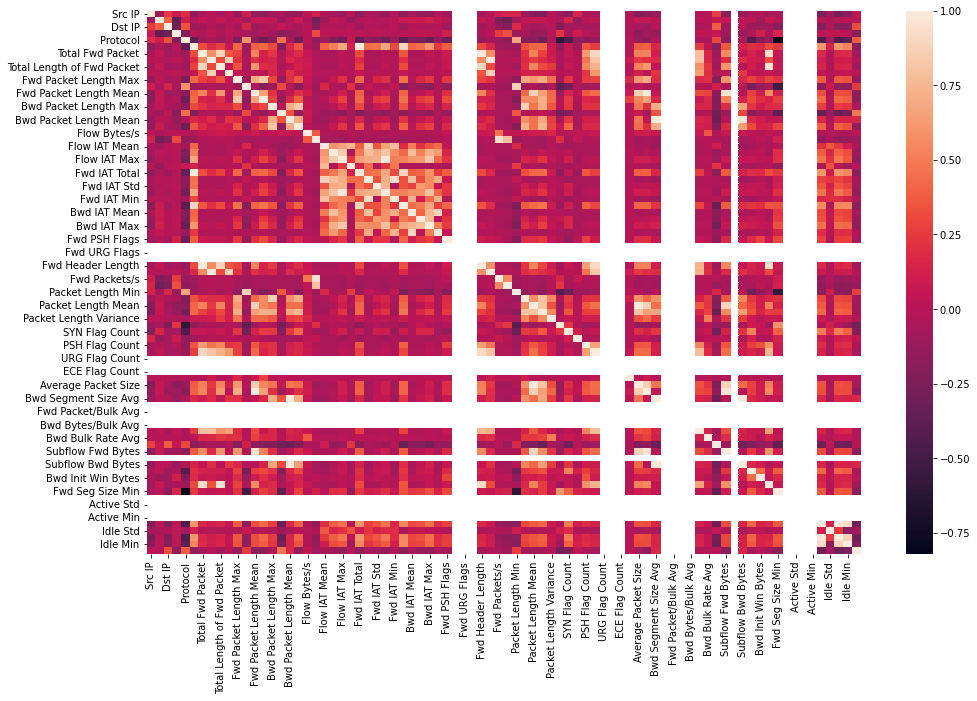

In [ ]:
# Correlation matrix and a heatmap for all the columns of the final pre processed matrix which is ready to be fit into a model

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

sns.heatmap(corr1)
plt.show()

Now I will be filtering the columns on the basis of a given threshold i.e keeping only those columns which have correlation >0.9 with the target variable. 0.9 is a strong correlation and so we are using it as threshold.

In [ ]:
columns = np.full((corr1.shape[0],), True, dtype=bool)
for i in range(corr1.shape[0]):
    for j in range(i+1, corr1.shape[0]):
        if corr1.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_final.columns[columns]
df_final = df_final[selected_columns]

In [ ]:
df_final.shape

(533720, 67)

#Model Training Phase
This phase includes: • Splitting into training and testing data • Defining the model: Gradient Boosting Classifier • Performing baseline tuning in the model on test dataset: Getting evaluation metrics • Performing Hyperparameter Tuning using 10 fold Cross Validation: Getting the best parameters • Testing the Tuned model on test dataset: Getting evaluation metrics • Comparing the models before and after tuning.

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split

y=target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print(y_train.head(20))

        Label.1
40010       5.0
238074      3.0
268127      3.0
402563      8.0
345064      5.0
480010      9.0
341819      5.0
352660      5.0
250973      3.0
507291     10.0
230255      2.0
114084      9.0
191343      1.0
403834      8.0
303152      4.0
399542      6.0
448941      9.0
202014      1.0
105323      9.0
92960       0.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

lr_list = [0.05, 0.075, 0.25, 0.75, 1, 1.75, 2]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=30, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train.values.ravel())

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.554
Accuracy score (validation): 0.553
Learning rate:  0.075
Accuracy score (training): 0.578
Accuracy score (validation): 0.578
Learning rate:  0.25
Accuracy score (training): 0.679
Accuracy score (validation): 0.678
Learning rate:  0.75
Accuracy score (training): 0.736
Accuracy score (validation): 0.735
Learning rate:  1
Accuracy score (training): 0.720
Accuracy score (validation): 0.719
Learning rate:  1.75
Accuracy score (training): 0.097
Accuracy score (validation): 0.096
Learning rate:  2
Accuracy score (training): 0.094
Accuracy score (validation): 0.096


In [ ]:
#Cross validation 10 fold
gbr=GradientBoostingClassifier(learning_rate=0.07,n_estimators=350, max_depth=6,subsample=1,verbose=False)
gbr.fit(x_train,y_train.values.ravel())

from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator = gb_clf, X = x_train, y = y_train, cv = 10)

In [ ]:
#Baseline prediction 1 : before tuning 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
    
baseline = GradientBoostingClassifier(learning_rate=1, n_estimators=40,max_depth=3, min_samples_split=200, min_samples_leaf=1, subsample=1,max_features=2, random_state=10)
baseline.fit(x_train,y_train.values.ravel())
predictors=list(x_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(x_test, y_test)))
pred=baseline.predict(x_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.678
              precision    recall  f1-score   support

         0.0       0.56      0.74      0.64     14665
         1.0       0.71      0.73      0.72     14541
         2.0       0.80      0.84      0.82     14571
         3.0       0.58      0.45      0.50     14609
         4.0       0.57      0.58      0.57     14480
         5.0       0.59      0.49      0.53     14632
         6.0       0.83      0.84      0.84     14507
         7.0       0.87      0.84      0.85     14583
         8.0       0.65      0.67      0.66     14453
         9.0       0.47      0.45      0.46     14490
        10.0       0.83      0.83      0.83     14585

    accuracy                           0.68    160116
   macro avg       0.68      0.68      0.67    160116
weighted avg       0.68      0.68      0.67    160116



In [ ]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,pred)
print(cf_matrix)

[[10888   124   589   446   238   757   148   369    32  1014    60]
 [  434 10664    40   278   165   611    16   180   172  1489   492]
 [  707   260 12178    83    35   293    52   196    89   666    12]
 [  475   290    89  6508  3854   491   505   106  1437   648   206]
 [  441   148   182  1449  8340   712   808    76  1743   484    97]
 [ 2645   488  1182   518   297  7122   152   468   332  1231   197]
 [  456    35     1   199   318    99 12233    29   929   108   100]
 [  342   154   228   166    58   704    65 12209    10   477   170]
 [ 1241   597    22   472   798   337   648   126  9702   318   192]
 [ 1486  2056   698   784   330   923   121   187   297  6592  1016]
 [  344   158     3   361   156   106    19    90   153  1129 12066]]


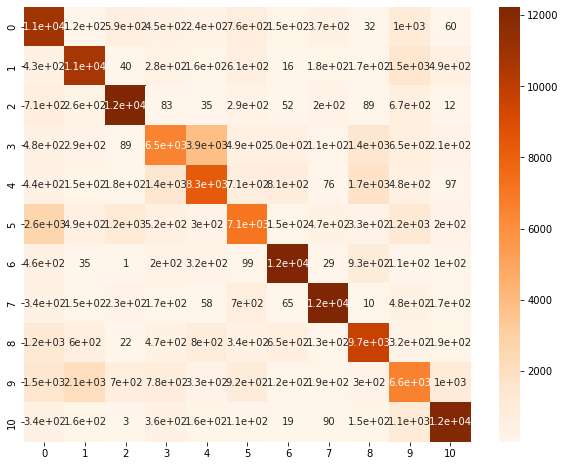

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(cf_matrix, annot=True, cmap=plt.cm.Oranges)
plt.show()

In [ ]:
#Baseline prediction 2 : before tuning
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
    
baseline = GradientBoostingClassifier(learning_rate=0.75, n_estimators=45,max_depth=2, min_samples_split=200, min_samples_leaf=1, subsample=1,max_features=2, random_state=10)
baseline.fit(x_train,y_train.values.ravel())
predictors=list(x_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(x_test, y_test)))
pred=baseline.predict(x_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.793
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     14665
         1.0       0.87      0.81      0.84     14541
         2.0       0.82      0.93      0.87     14571
         3.0       0.68      0.47      0.56     14609
         4.0       0.60      0.73      0.66     14480
         5.0       0.75      0.68      0.71     14632
         6.0       0.95      0.80      0.87     14507
         7.0       0.94      0.96      0.95     14583
         8.0       0.70      0.83      0.76     14453
         9.0       0.69      0.69      0.69     14490
        10.0       0.88      0.95      0.92     14585

    accuracy                           0.79    160116
   macro avg       0.80      0.79      0.79    160116
weighted avg       0.80      0.79      0.79    160116



In [ ]:
#Get the confusion matrix
cf_matrix1 = confusion_matrix(y_test,pred)
print(cf_matrix1)

[[12766     3   798     1    20   442    73   316    28   206    12]
 [    0 11815    36   120    76   296     6    18    97  1662   415]
 [  234     3 13509     7    87   379    13    87    13   237     2]
 [   89   193    59  6893  4719   435    71    19  1473   576    82]
 [   32   142    73  1284 10619   287    78    28  1792   131    14]
 [  690   205  1147   351   462  9889   197   176   345   879   291]
 [   38     2    32   730   470    96 11678   195  1230     7    29]
 [  183     4    89     9    12   158    62 14053     5     8     0]
 [   13   124     1   460  1095   192    87     5 11961   331   184]
 [  472   977   761   181   159   916    65    30   156  9936   837]
 [    0   132     0    30    10    30     5     0    68   434 13876]]


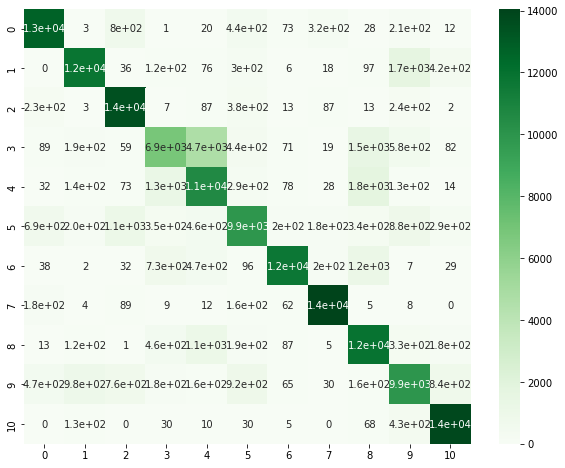

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(cf_matrix1,annot=True, cmap=plt.cm.Greens)
plt.show()

#Hyperparameter Tuning
After trying like 15 different combinations,I reached a conclusion that learning rate of range 0.5-1, n_estimators:30-50, max_depth: 3-5 are giving better results.

So while doing hyperparameter tuning, I passed these values in the parameter grid accordingly to get the best combination possible.

In [ ]:
#Performing HyperParameter Tuning:Learning rate,n_estimators_max_depth (using 10 fold Grid search CV)
from sklearn.model_selection import GridSearchCV


p_test= {'learning_rate':[0.5,0.75,1.5], 'n_estimators':[30,45,50],'max_depth':[2,3,5]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(min_samples_split=200, min_samples_leaf=1, subsample=1,max_features=3, random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,cv=10,verbose=4)
tuning.fit(x_train,y_train)

print('The best Parameters are:',tuning.best_params_)
print('The best score is:',tuning.best_score_)

In [ ]:
#New model prediction : after tuning
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
    
model_new = GradientBoostingClassifier(learning_rate=0.5, n_estimators=45,max_depth=5, min_samples_split=200, min_samples_leaf=1, subsample=1,max_features=3, random_state=10)
model_new.fit(x_train,y_train.values.ravel())
predictors_1=list(x_train)
print('Accuracy of the GBM on test set after tuning : {:.3f}'.format(model_new.score(x_test, y_test)))
pred1=model_new.predict(x_test)
print(classification_report(y_test, pred1))

Accuracy of the GBM on test set after tuning : 0.867
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     14665
         1.0       0.93      0.86      0.89     14541
         2.0       0.90      0.93      0.92     14571
         3.0       0.82      0.64      0.72     14609
         4.0       0.70      0.74      0.72     14480
         5.0       0.89      0.82      0.85     14632
         6.0       0.89      0.90      0.90     14507
         7.0       0.98      0.99      0.99     14583
         8.0       0.77      0.88      0.82     14453
         9.0       0.80      0.83      0.81     14490
        10.0       0.95      0.99      0.97     14585

    accuracy                           0.87    160116
   macro avg       0.87      0.87      0.87    160116
weighted avg       0.87      0.87      0.87    160116



In [ ]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix2 = confusion_matrix(y_test,pred)
print(cf_matrix2)

[[12766     3   798     1    20   442    73   316    28   206    12]
 [    0 11815    36   120    76   296     6    18    97  1662   415]
 [  234     3 13509     7    87   379    13    87    13   237     2]
 [   89   193    59  6893  4719   435    71    19  1473   576    82]
 [   32   142    73  1284 10619   287    78    28  1792   131    14]
 [  690   205  1147   351   462  9889   197   176   345   879   291]
 [   38     2    32   730   470    96 11678   195  1230     7    29]
 [  183     4    89     9    12   158    62 14053     5     8     0]
 [   13   124     1   460  1095   192    87     5 11961   331   184]
 [  472   977   761   181   159   916    65    30   156  9936   837]
 [    0   132     0    30    10    30     5     0    68   434 13876]]


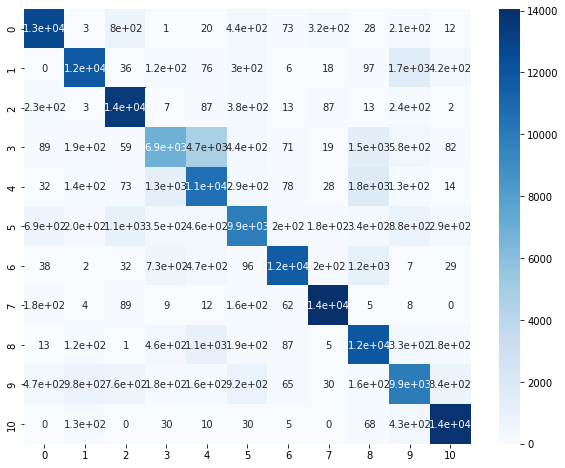

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(cf_matrix2, annot=True, cmap=plt.cm.Blues)
plt.show()

#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier #For Random Forest Model
from sklearn.linear_model import LogisticRegression #For Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train) 
y_pred_lr = lr_model.predict(x_test)

rf_model = RandomForestClassifier(n_estimators=10, criterion = "entropy")
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_lr)) 
print(accuracy_score(y_test, y_pred_rf))

0.2884721077219016
0.9090846636188763


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_predict =knn_model.predict(x_test)
y_predict

array([ 1.,  7.,  9., ...,  3., 10.,  4.])

In [ ]:
cm = confusion_matrix(y_test,y_predict)

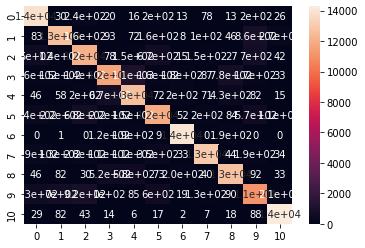

In [ ]:
sns.heatmap(cm ,annot=True)

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.9174982066573163
Test set Accuracy:  0.8743848210047716


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     14665
         1.0       0.89      0.87      0.88     14541
         2.0       0.82      0.83      0.82     14571
         3.0       0.86      0.80      0.83     14609
         4.0       0.84      0.87      0.85     14480
         5.0       0.84      0.81      0.83     14632
         6.0       0.95      0.97      0.96     14507
         7.0       0.94      0.89      0.91     14583
         8.0       0.88      0.88      0.88     14453
         9.0       0.79      0.77      0.78     14490
        10.0       0.95      0.98      0.96     14585

    accuracy                           0.87    160116
   macro avg       0.87      0.87      0.87    160116
weighted avg       0.87      0.87      0.87    160116



#Trying for a random k value for example 5

In [ ]:
k=5

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

yhat6 = neigh6.predict(x_test)

print("Train set Accuracy:",metrics.accuracy_score(y_train,neigh6.predict(x_train)))
print("Test set accuracy:",metrics.accuracy_score(y_test , yhat6))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train set Accuracy: 0.9174982066573163
Test set accuracy: 0.8743848210047716


# Ensemble Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
logreg = LogisticRegression(multi_class='multinomial' , random_state=1)
knnclass = KNeighborsClassifier(n_neighbors = 8)
dtreg = DecisionTreeClassifier(random_state=0, max_depth=5);

In [ ]:
ensembleClassfier = VotingClassifier(estimators=[('lr',logreg), ('dtree', dtreg), ('knn', knnclass)], voting='soft')

In [ ]:
ensembleClassfier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('dtree',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [ ]:
y_ec_pred = ensembleClassfier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_ec_pred)

0.8774013839966025

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
logistic_model = LogisticRegression(mutlti_class="multinomial" ,random_state=0)
logistic_model.fit(x_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_predict = logistic_model.predict(x_test)
y_predict

array([1., 7., 7., ..., 7., 1., 4.])

In [ ]:
cm = confusion_matrix(y_test,y_predict)

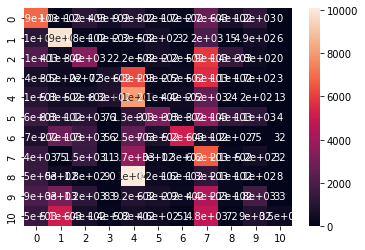

In [ ]:
sns.heatmap(cm,  annot=True)

In [ ]:
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_predict = logistic_model.predict(x_test)

In [ ]:
cn = confusion_matrix(y_test,y_predict)

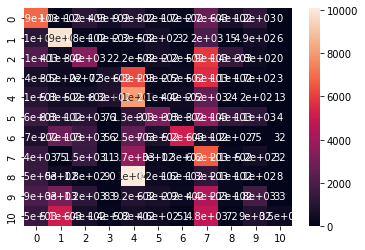

In [ ]:
sns.heatmap(cn , annot =True)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.34      0.47      0.39     14665
         1.0       0.42      0.68      0.52     14541
         2.0       0.29      0.23      0.26     14571
         3.0       0.28      0.05      0.08     14609
         4.0       0.23      0.56      0.33     14480
         5.0       0.41      0.21      0.28     14632
         6.0       0.71      0.36      0.47     14507
         7.0       0.17      0.46      0.24     14583
         8.0       0.05      0.01      0.02     14453
         9.0       0.25      0.12      0.17     14490
        10.0       0.73      0.02      0.05     14585

    accuracy                           0.29    160116
   macro avg       0.35      0.29      0.26    160116
weighted avg       0.35      0.29      0.26    160116



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_Df = clf.predict(x_test)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred_Df))

print(classification_report(y_test,y_pred_Df))


#cm=confusion_matrix(y_test,y_pred_Df)
#sns.heatmap(cm/np.sum(cm),annot=True)
#plt.ioff()

Decision Tree Accuracy: 0.5553536186264958


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83     14665
         1.0       0.58      0.79      0.67     14541
         2.0       0.44      0.95      0.60     14571
         3.0       0.78      0.32      0.45     14609
         4.0       0.35      0.53      0.42     14480
         5.0       0.37      0.26      0.31     14632
         6.0       0.47      0.65      0.55     14507
         7.0       1.00      0.63      0.78     14583
         8.0       0.97      0.26      0.41     14453
         9.0       0.00      0.00      0.00     14490
        10.0       0.54      0.96      0.69     14585

    accuracy                           0.56    160116
   macro avg       0.58      0.55      0.52    160116
weighted avg       0.58      0.56      0.52    160116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
